In [28]:
import pandas as pd
import os
import warnings
import numpy as np
warnings.filterwarnings("ignore")
def read_csv_file(path):
    application_train = pd.read_csv(path)
    return(application_train)
application_train = read_csv_file('F:\\home-credit-default-risk\\application_train.csv')

In [29]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [3]:
numeric_features = []
categorical_features = []

for column in application_train.columns:
    if application_train[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numeric_features.append(column)

print("numeric:")
print(numeric_features)
print("\nstring:")
print(categorical_features)

numeric:
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MOD

In [30]:
document_cols = [column for column in application_train.columns if 'FLAG' in column and 'DOCUMENT'in column]
application_train['document_nums'] = application_train[document_cols].sum(axis=1)
application_train.drop(columns = document_cols,axis = 1,inplace=True)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,document_nums
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,1
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,1
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
contain_flag_columns = [column for column in application_train.columns if 'FLAG' in column ]
for column in contain_flag_columns:
    print(application_train[column].value_counts())
application_train.drop(['FLAG_OWN_REALTY'],inplace=True,axis=1)
application_train

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
1    307510
0         1
Name: FLAG_MOBIL, dtype: int64
1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64
0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64
1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64
0    221080
1     86431
Name: FLAG_PHONE, dtype: int64
0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,document_nums
0,100002,1,Cash loans,M,N,0,202500.0,406597.5,24700.5,351000.0,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,0,135000.0,312682.5,29686.5,297000.0,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,0,Cash loans,M,N,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,0,157500.0,254700.0,27558.0,225000.0,...,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,1
307507,456252,0,Cash loans,F,N,0,72000.0,269550.0,12001.5,225000.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
307508,456253,0,Cash loans,F,N,0,153000.0,677664.0,29979.0,585000.0,...,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,1
307509,456254,1,Cash loans,F,N,0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [32]:
numeric_features = []
categorical_features = []

for column in application_train.columns:
    if application_train[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numeric_features.append(column)

print("numeric:")
print(numeric_features)
print("\nstring:")
print(categorical_features)

numeric:
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MOD

In [33]:
def calculate_woe_iv(df, feature, target):
    df_cross = pd.crosstab(df[feature], df[target])
    df_cross['Total'] = df_cross.sum(axis=1)
    df_cross['Event Rate'] = df_cross[1] / df_cross['Total']
    df_cross['Non-Event Rate'] = df_cross[0] / df_cross['Total']
    df_cross['Event Distribution'] = df_cross[1] / df_cross[1].sum()
    df_cross['Non-Event Distribution'] = df_cross[0] / df_cross[0].sum()
    df_cross['WoE'] = np.log((df_cross['Event Distribution'] + 0.0001) / (df_cross['Non-Event Distribution'] + 0.0001))
    df_cross['IV'] = (df_cross['Event Distribution'] - df_cross['Non-Event Distribution']) * df_cross['WoE']
    iv = df_cross['IV'].sum()
    return iv

iv_values = {col: calculate_woe_iv(application_train, col, 'TARGET') for col in categorical_features}

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'Information Value'])
iv_df = iv_df.sort_values(by='Information Value', ascending=False)
iv_df

,Feature,Information Value
8,OCCUPATION_TYPE,0.086019
10,ORGANIZATION_TYPE,0.072718
4,NAME_INCOME_TYPE,0.057993
5,NAME_EDUCATION_TYPE,0.050605
1,CODE_GENDER,0.038590
6,NAME_FAMILY_STATUS,0.021676
7,NAME_HOUSING_TYPE,0.015685
0,NAME_CONTRACT_TYPE,0.015021
13,WALLSMATERIAL_MODE,0.013630
2,FLAG_OWN_CAR,0.006595


In [11]:
iv_df['Feature'].iloc[0:3]

8       OCCUPATION_TYPE
10    ORGANIZATION_TYPE
4      NAME_INCOME_TYPE
Name: Feature, dtype: object

In [35]:
import pandas as pd
import numpy as np
import plotly.express as px

def calculate_woe_iv(df, feature, target):
    lst = []
    unique_values = df[feature].unique()
    for val in unique_values:
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 0)].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WOE'] = np.log((dset['Distr_Good']+0.0001) / (dset['Distr_Bad']+0.0001))
    dset.replace({'WOE': {np.inf: 0, -np.inf: 0}}, inplace=True)
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WOE']
    return dset

features = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE']

for feature in features:
    dset = calculate_woe_iv(application_train, feature, 'TARGET')
    fig = px.bar(dset, x='Value', y='WOE', title=f'WOE Distribution for {feature}',
                 labels={'WOE': 'Weight of Evidence', 'Value': feature},
                 color='WOE',
                 color_continuous_scale='Viridis')  
    fig.update_layout(xaxis_title=feature, yaxis_title='Weight of Evidence',
                      coloraxis_colorbar=dict(title='WOE'))
    fig.show()


In [36]:
import plotly.graph_objs as go
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py

data = [go.Scatter(
    x=iv_df['Feature'],
    y=iv_df['Information Value'],
    mode='markers',
    marker=dict(
        size = 25,
        color=iv_df['Information Value'],
        colorscale='Viridis',  
        showscale=True  
        
    )
)]

layout = go.Layout(
    autosize=True,
    title='IV score ',
    hovermode='closest',
    yaxis=dict(
        title='IV score',
        ticklen=5,
        gridwidth=2
    ),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename='feature_importance.html')


'feature_importance.html'

In [18]:
application_train.drop(columns = (iv_df[iv_df['Information Value']<0.01]['Feature']),axis=1,inplace=True)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,document_nums
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Working,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Working,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Working,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Working,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Working,...,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,1
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Pensioner,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Working,...,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,1
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,...,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [19]:
(application_train['DAYS_EMPLOYED']/-365).describe()
application_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

In [20]:
for col in application_train.columns:
    if col in numeric_features:
        print(application_train[col].describe())
        print('...........................')
    else:
        print(application_train[col].value_counts())
        print('.......................')
    

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
...........................
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
...........................
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
.......................
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
.......................
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
...........................
count    3.075110e+05
mean     1.687979e+05
std      2

count    98869.000000
mean         0.231894
std          0.161380
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64
...........................
count    124921.000000
mean          0.066333
std           0.081184
min           0.000000
25%           0.018700
50%           0.048100
75%           0.085600
max           1.000000
Name: LANDAREA_AVG, dtype: float64
...........................
count    97312.000000
mean         0.100775
std          0.092576
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64
...........................
count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64
...........................
count    93997.00

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
...........................
count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
...........................
count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
...........................
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype:

In [21]:
import pandas as pd
import numpy as np

def calculate_woe_iv(df, feature, target):
    # Handle missing values as a separate category
    df[feature] = df[feature].fillna("Missing")
    # Initialize the list for storing data
    lst = []
    # Extract unique values from the feature
    values = df[feature].unique()
    # Calculate the counts for each unique value
    for val in values:
        total = df[df[feature] == val].shape[0]
        good = df[(df[feature] == val) & (df[target] == 0)].shape[0]
        bad = df[(df[feature] == val) & (df[target] == 1)].shape[0]
        lst.append({
            'Value': val,
            'All': total,
            'Good': good,
            'Bad': bad
        })
    
    # Create a DataFrame with the aggregated data
    dset = pd.DataFrame(lst)
    
    # Calculate the distribution of Good and Bad
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    
    # Calculate WoE, handle division by zero or cases where distr is 0
    dset['WoE'] = np.log((dset['Distr_Good'] + 0.0001) / (dset['Distr_Bad'] + 0.0001))
    dset.replace({'WoE': {np.inf: 0, -np.inf: 0}}, inplace=True)
    
    # Calculate IV
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    
    return dset

# Example usage
# Assume application_train is your DataFrame and 'TARGET' is the binary outcome column
for column in application_train.select_dtypes(include='object').columns:
    if column != 'TARGET':
        woe_iv_df = calculate_woe_iv(application_train, column, 'TARGET')
        # Merge WOE and IV values back to the original dataframe
        application_train = application_train.merge(woe_iv_df[['Value', 'WoE']], left_on=column, right_on='Value', how='left')
        # Rename the WOE column
        application_train.rename(columns={'WoE': 'woe_' + column}, inplace=True)
        # Drop the original and Value columns if needed
        application_train.drop(columns=[column, 'Value'], inplace=True)


In [22]:
application_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,document_nums,woe_NAME_CONTRACT_TYPE,woe_CODE_GENDER,woe_NAME_INCOME_TYPE,woe_NAME_EDUCATION_TYPE,woe_NAME_FAMILY_STATUS,woe_NAME_HOUSING_TYPE,woe_OCCUPATION_TYPE,woe_ORGANIZATION_TYPE,woe_WALLSMATERIAL_MODE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,...,1,-0.036232,-0.250865,-0.188641,-0.111479,-0.213574,0.037943,-0.297829,-0.154832,0.093447
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,...,1,-0.036232,0.154282,0.362745,0.439374,0.071210,0.037943,0.266060,0.332928,0.149877
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,...,0,0.415018,-0.250865,-0.188641,-0.111479,-0.213574,0.037943,-0.297829,0.157078,-0.134370
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,...,1,-0.036232,0.154282,-0.188641,-0.111479,-0.228873,0.037943,-0.297829,-0.154832,-0.134370
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,...,1,-0.036232,-0.250865,-0.188641,-0.111479,-0.213574,0.037943,0.266060,0.239563,-0.134370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,...,1,-0.036232,-0.250865,-0.188641,-0.111479,-0.016216,-0.410426,-0.193492,0.212266,0.093447
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,NaN,...,1,-0.036232,0.154282,0.433152,-0.111479,0.349871,0.037943,0.231446,0.430552,0.093447
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,...,1,-0.036232,0.154282,-0.188641,0.439374,-0.016216,0.037943,0.281262,0.332928,0.258881
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786.0,...,1,-0.036232,0.154282,0.082055,-0.111479,0.071210,0.037943,-0.297829,-0.008747,0.093447


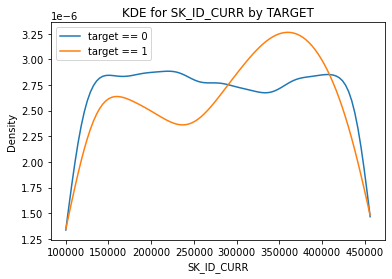

Failed to plot KDE for TARGET. Error: singular matrix


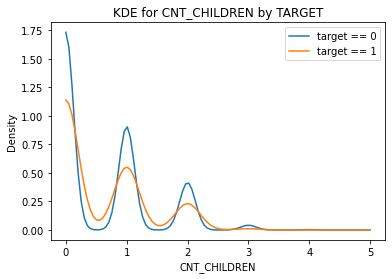

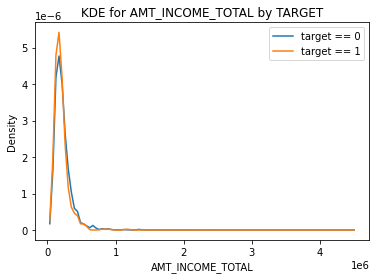

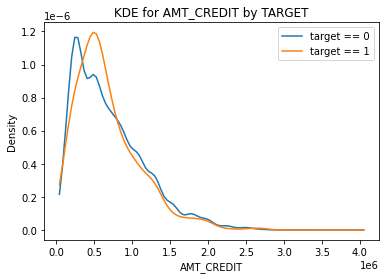

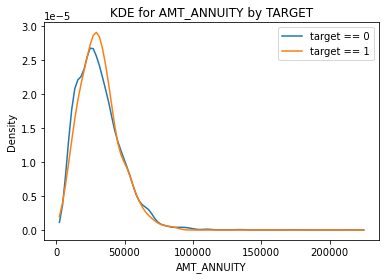

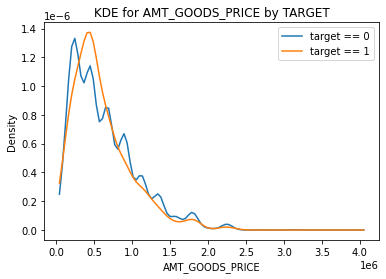

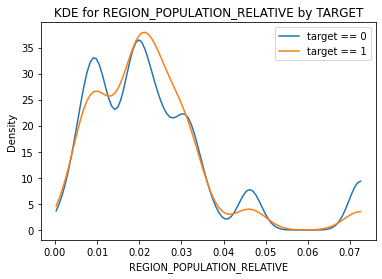

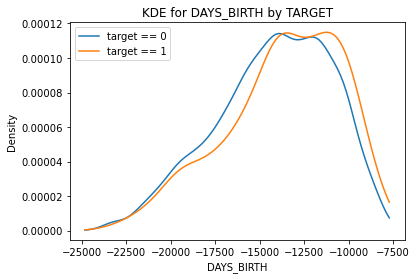

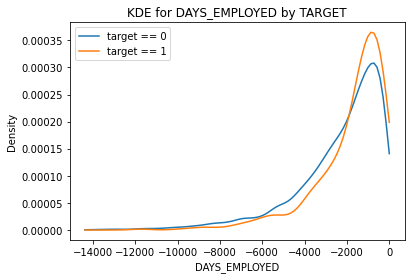

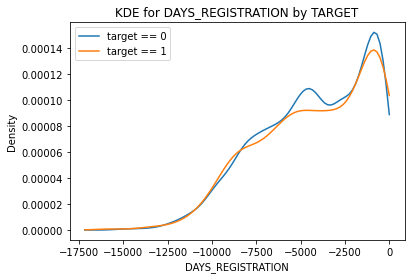

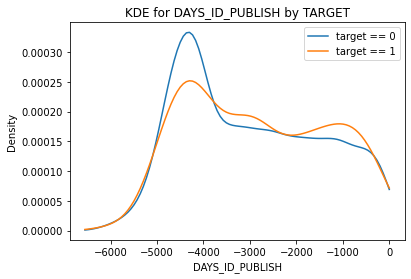

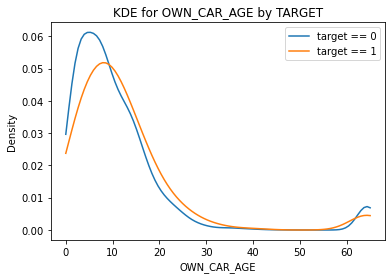

Failed to plot KDE for FLAG_MOBIL. Error: singular matrix
Failed to plot KDE for FLAG_EMP_PHONE. Error: singular matrix


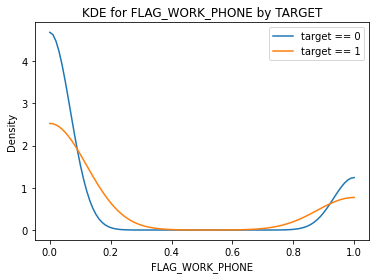

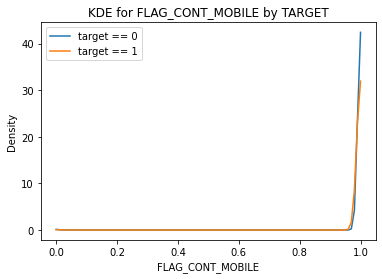

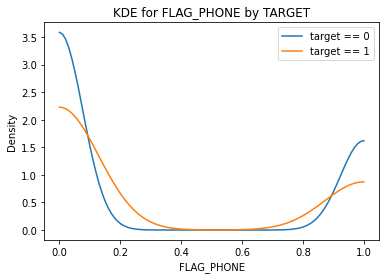

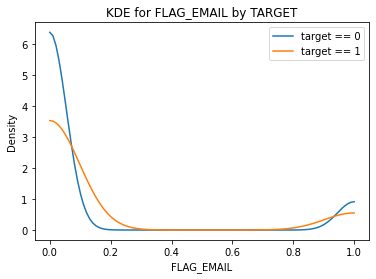

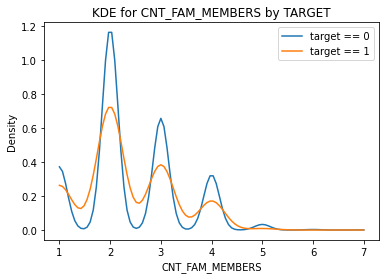

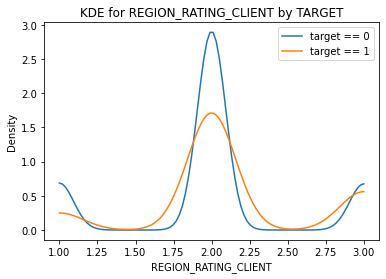

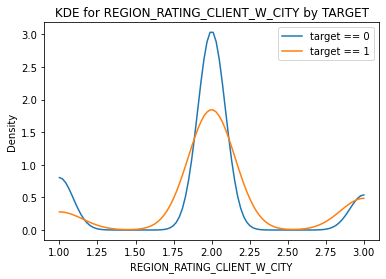

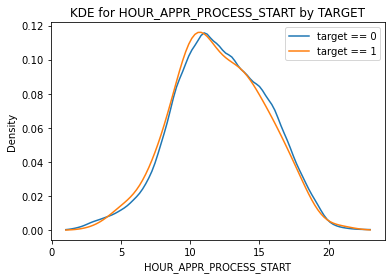

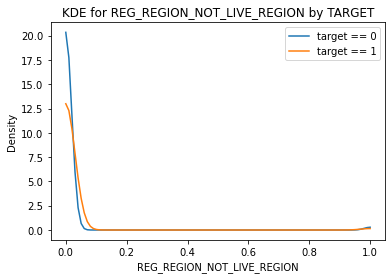

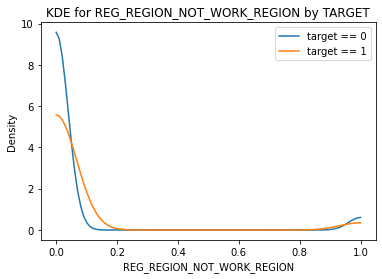

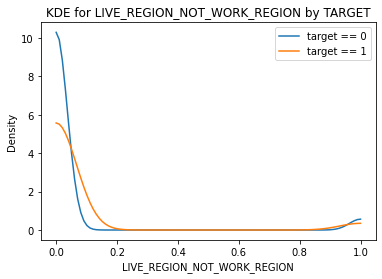

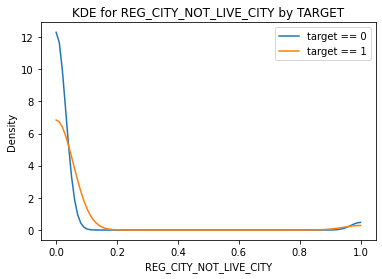

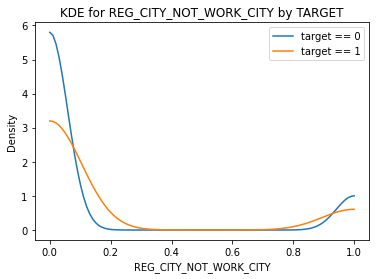

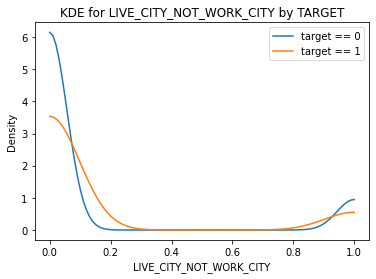

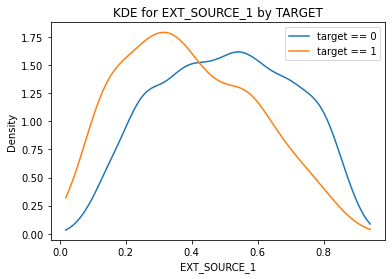

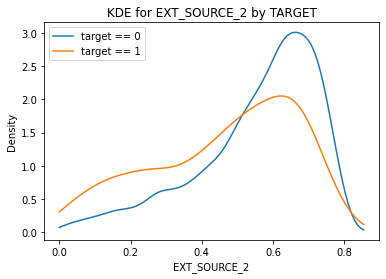

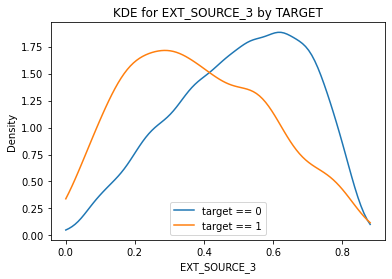

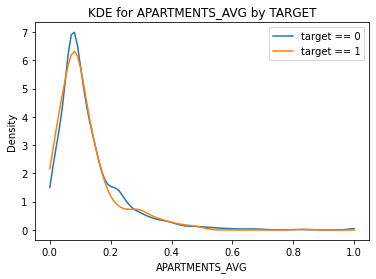

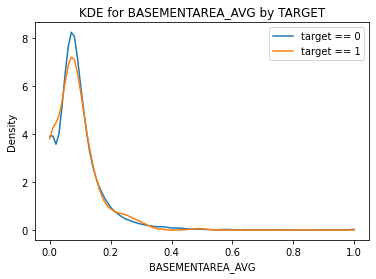

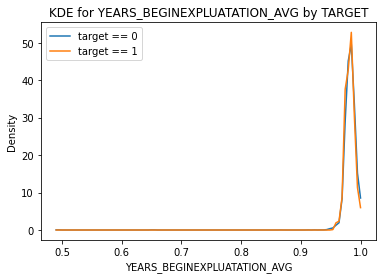

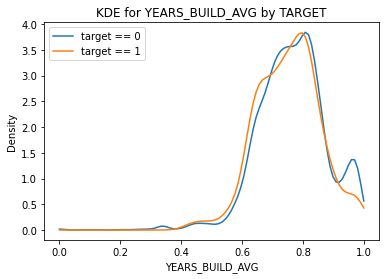

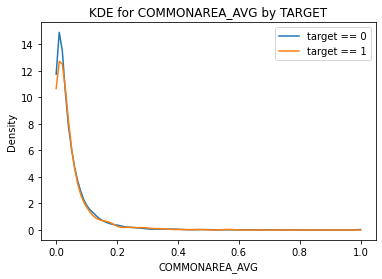

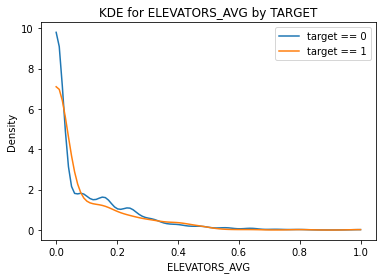

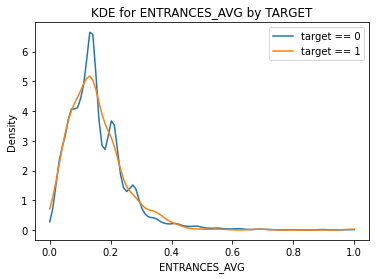

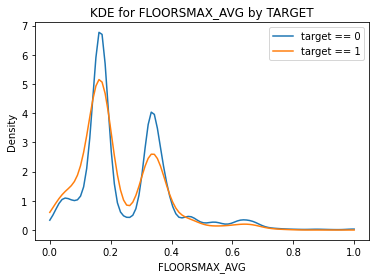

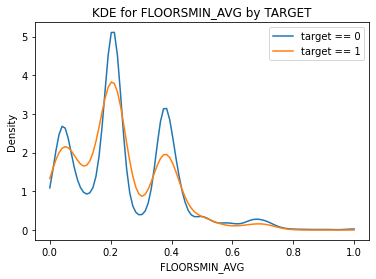

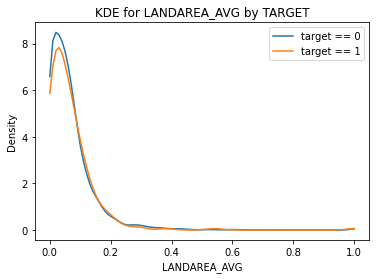

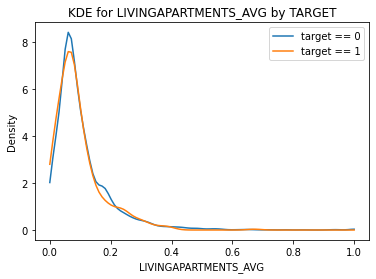

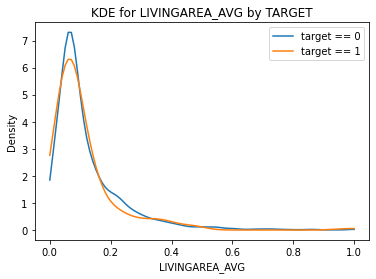

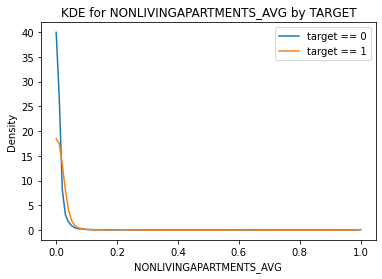

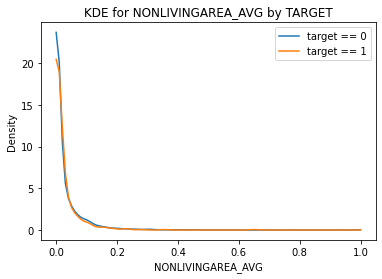

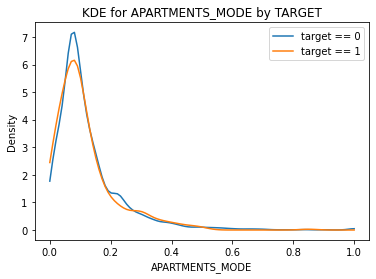

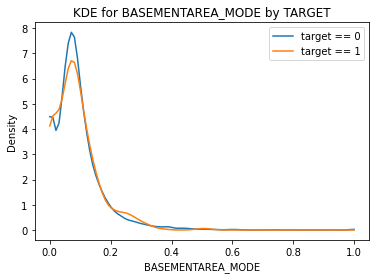

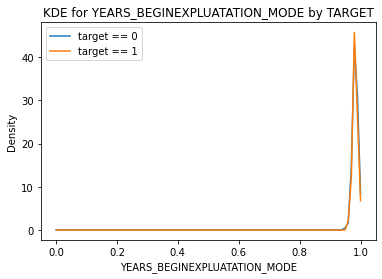

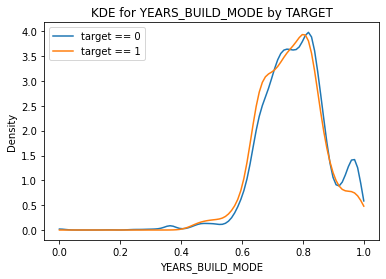

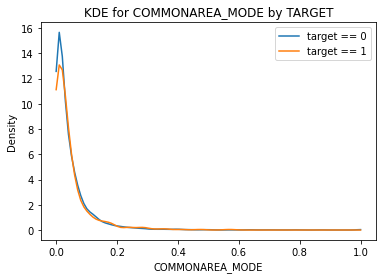

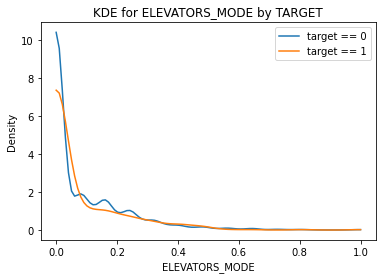

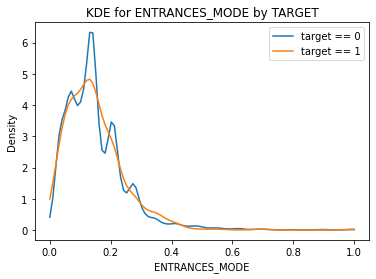

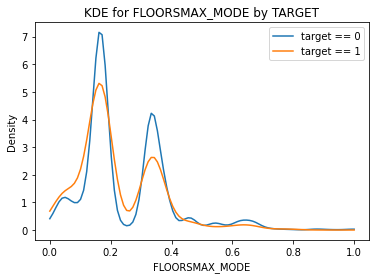

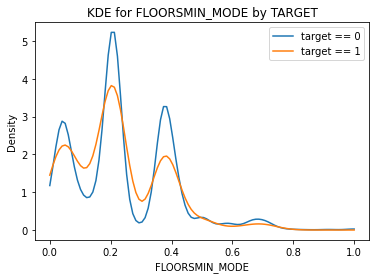

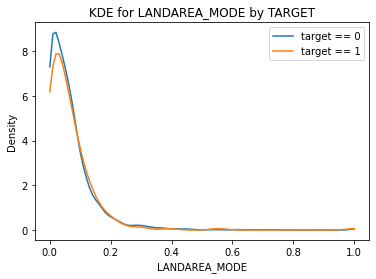

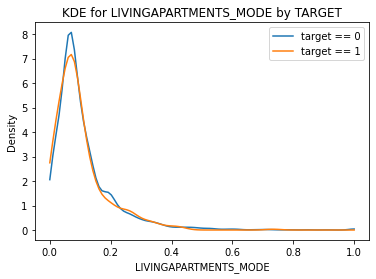

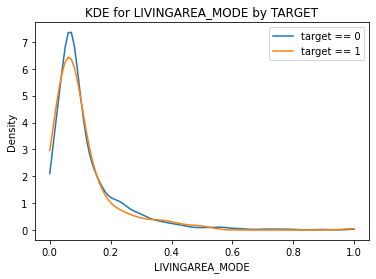

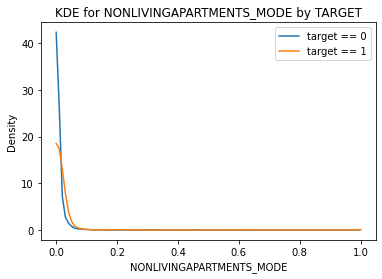

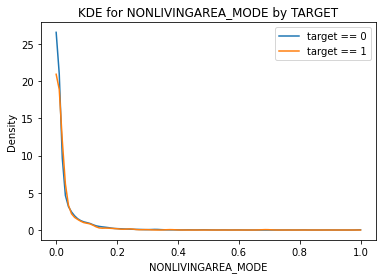

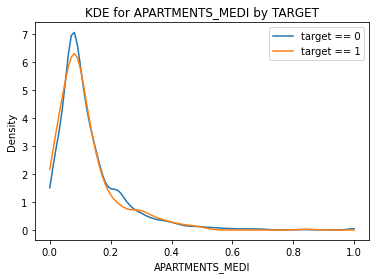

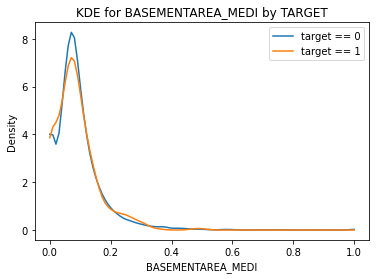

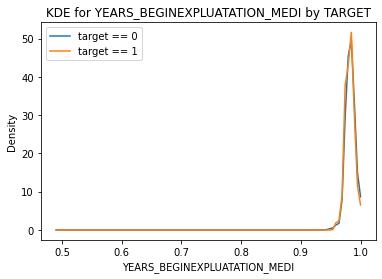

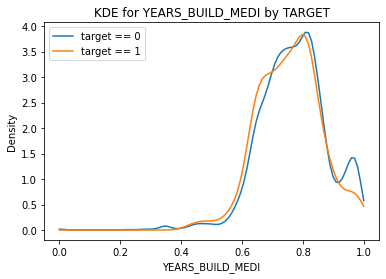

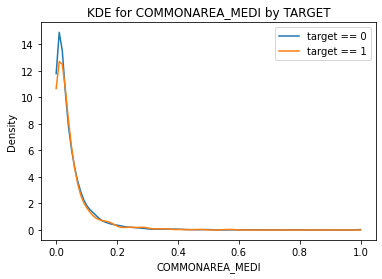

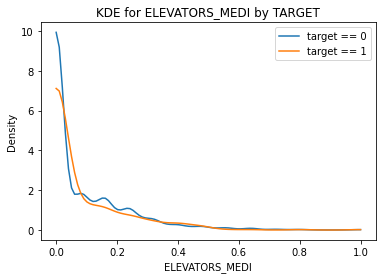

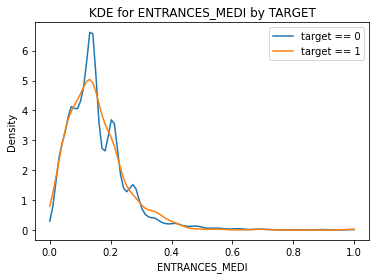

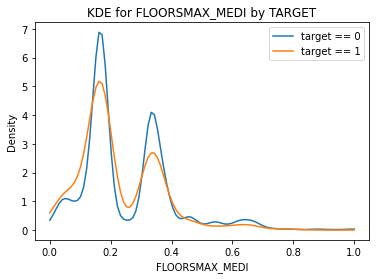

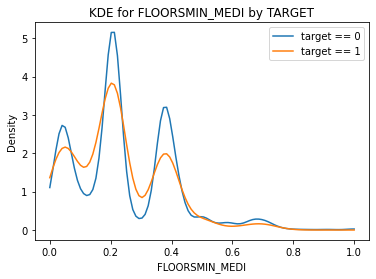

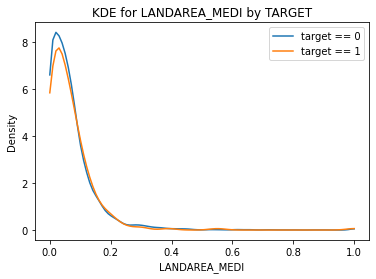

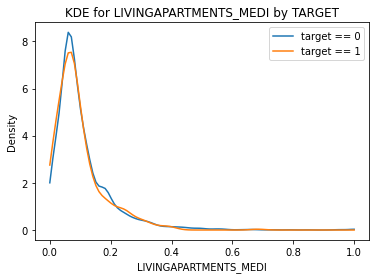

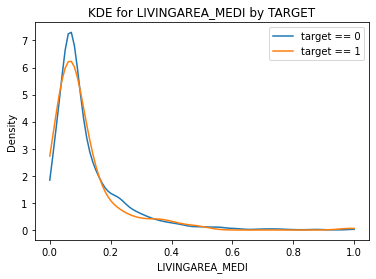

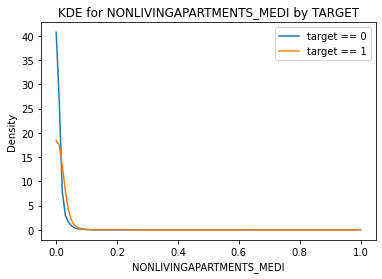

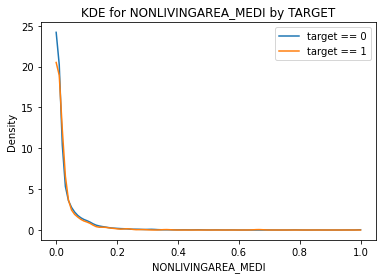

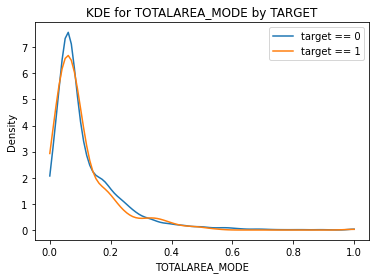

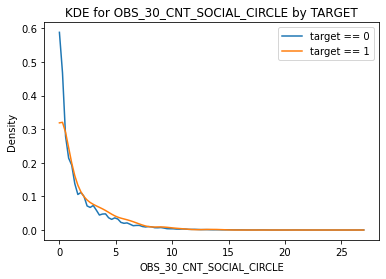

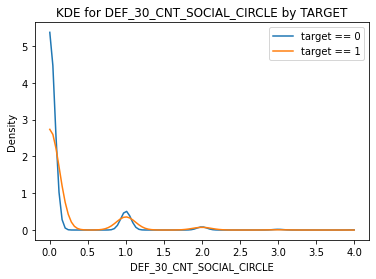

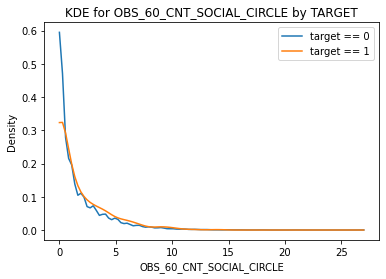

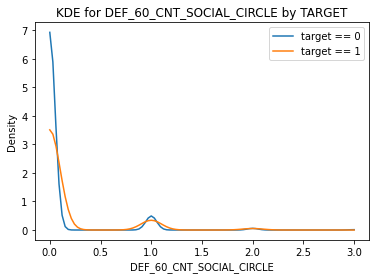

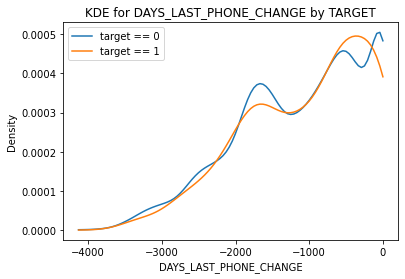

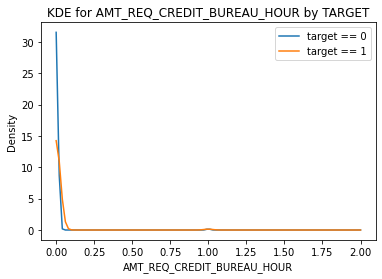

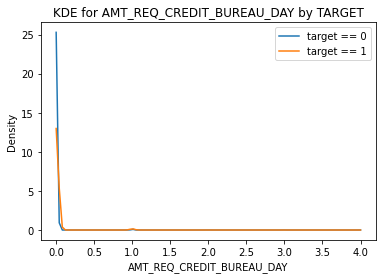

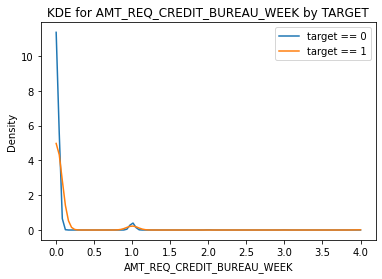

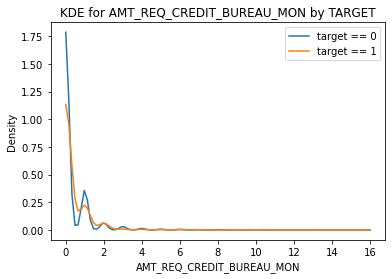

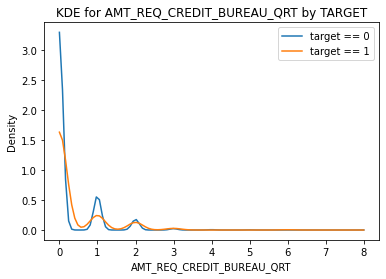

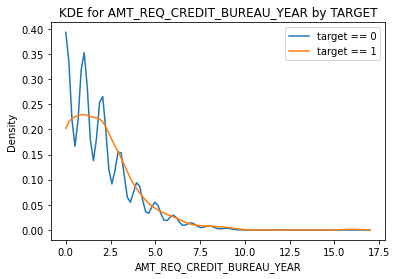

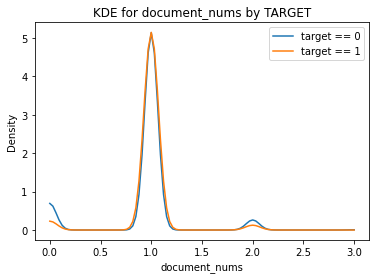

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_kde_by_target(df, target, num_points=100):
    """
    Plots KDEs for each numeric feature in the DataFrame based on a binary target.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        target (str): The column name of the binary target.
        num_points (int): The number of points to use for the x-axis in the KDE plot.
    """
    # Iterate over each numeric column in the DataFrame
    for feature in df.select_dtypes(include=[np.number]).columns:
        try:
            # Filter data by the target column
            data_0 = df[df[target] == 0][feature]
            data_1 = df[df[target] == 1][feature]

            # Ensure there's enough data for KDE calculation
            if len(data_0) > 1 and len(data_1) > 1:
                kde_0 = gaussian_kde(data_0)
                kde_1 = gaussian_kde(data_1)

                # Define the range for x values
                x_range = np.linspace(min(data_0.min(), data_1.min()), max(data_0.max(), data_1.max()), num_points)

                # Plotting the KDEs
                plt.plot(x_range, kde_0(x_range), label='target == 0')
                plt.plot(x_range, kde_1(x_range), label='target == 1')

                plt.title(f'KDE for {feature} by {target}')
                plt.xlabel(feature)
                plt.ylabel('Density')
                plt.legend()
                plt.show()

        except Exception as e:
            print(f"Failed to plot KDE for {feature}. Error: {e}")

# Usage example:
# plot_kde_by_target(df, 'TARGET')
plot_kde_by_target(application_train.dropna(),'TARGET')


In [23]:
application_train.drop(columns=['FLAG_CONT_MOBILE',
                                'YEARS_BEGINEXPLUATATION_AVG','NONLIVINGAREA_MODE',
                                'YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI'
                                ,'NONLIVINGAREA_MEDI','NONLIVINGAREA_AVG'],inplace=True,axis=1)
application_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,document_nums,woe_NAME_CONTRACT_TYPE,woe_CODE_GENDER,woe_NAME_INCOME_TYPE,woe_NAME_EDUCATION_TYPE,woe_NAME_FAMILY_STATUS,woe_NAME_HOUSING_TYPE,woe_OCCUPATION_TYPE,woe_ORGANIZATION_TYPE,woe_WALLSMATERIAL_MODE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,...,1,-0.036232,-0.250865,-0.188641,-0.111479,-0.213574,0.037943,-0.297829,-0.154832,0.093447
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,...,1,-0.036232,0.154282,0.362745,0.439374,0.071210,0.037943,0.266060,0.332928,0.149877
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,...,0,0.415018,-0.250865,-0.188641,-0.111479,-0.213574,0.037943,-0.297829,0.157078,-0.134370
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,...,1,-0.036232,0.154282,-0.188641,-0.111479,-0.228873,0.037943,-0.297829,-0.154832,-0.134370
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,...,1,-0.036232,-0.250865,-0.188641,-0.111479,-0.213574,0.037943,0.266060,0.239563,-0.134370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,...,1,-0.036232,-0.250865,-0.188641,-0.111479,-0.016216,-0.410426,-0.193492,0.212266,0.093447
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,NaN,...,1,-0.036232,0.154282,0.433152,-0.111479,0.349871,0.037943,0.231446,0.430552,0.093447
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,...,1,-0.036232,0.154282,-0.188641,0.439374,-0.016216,0.037943,0.281262,0.332928,0.258881
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786.0,...,1,-0.036232,0.154282,0.082055,-0.111479,0.071210,0.037943,-0.297829,-0.008747,0.093447


In [13]:
application_train.to_csv('E://result//application_train.csv',index=False)

In [121]:
house_attr = [

    "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG",
    "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG",
    "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG",
    "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",
]
for attr in house_attr:
    print(attr,application_train[attr].isnull().mean())
    
    

APARTMENTS_AVG 0.5074972927797705
BASEMENTAREA_AVG 0.5851595552679416
YEARS_BEGINEXPLUATATION_AVG 0.48781019215572774
YEARS_BUILD_AVG 0.6649778381911542
COMMONAREA_AVG 0.6987229725115525
ELEVATORS_AVG 0.532959796560123
ENTRANCES_AVG 0.503487680115508
FLOORSMAX_AVG 0.4976082156410665
FLOORSMIN_AVG 0.6784862980511266
LANDAREA_AVG 0.5937673774271489
LIVINGAPARTMENTS_AVG 0.6835495315614726
LIVINGAREA_AVG 0.5019332641759157
NONLIVINGAPARTMENTS_AVG 0.6943296337366793
NONLIVINGAREA_AVG 0.5517916432257708


In [122]:
cluster_dataset = application_train[house_attr].dropna()
cluster_dataset.isnull().any()
cluster_dataset = cluster_dataset.astype(float)
cluster_dataset

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098
13,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,0.0931,0.1202,0.1397,0.0000,0.0000
14,0.3495,0.1335,0.9985,0.9796,0.1143,0.40,0.1724,0.6667,0.7083,0.1758,0.2849,0.3774,0.0193,0.1001
18,0.0278,0.0617,0.9881,0.8368,0.0018,0.00,0.1034,0.0833,0.1250,0.0279,0.0227,0.0290,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307483,0.0082,0.0000,0.9747,0.6532,0.0000,0.00,0.0690,0.0417,0.0417,0.0034,0.0067,0.0076,0.0000,0.0033
307489,0.0113,0.0000,0.9677,0.5580,0.0009,0.00,0.0345,0.0000,0.0417,0.0144,0.0092,0.0025,0.0000,0.0000
307505,0.2206,0.1638,0.9861,0.8096,0.1432,0.24,0.2069,0.3333,0.3750,0.0859,0.1765,0.2302,0.0154,0.0083
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095


In [123]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
for k in range(2,15):
    try:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(cluster_dataset)
        inertia.append(kmeans.inertia_)
    except Exception as e:
        print(f"An exception occurred for k={k}: {e}")
        break  # Optional: break the loop if an exception is encountered
inertia

[7473.223293714358,
 5972.510913793443,
 5439.406966141308,
 4957.794554076035,
 4528.699744473927,
 4230.166189922136,
 4000.026973664354,
 3780.9259386316025,
 3600.80035498496,
 3462.9856734949462,
 3368.832749247652,
 3243.7552778835657,
 3171.251914232]

In [124]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
cluster_dataset_scaled = scaler.fit_transform(cluster_dataset)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(cluster_dataset)
cluster_labels = kmeans.labels_
cluster_names = {0: 'A', 1: 'B', 2: 'C'}
named_labels = [cluster_names[label] for label in cluster_labels]
cluster_dataset['home_attr'] = named_labels
cluster_dataset['home_attr']


0         A
1         C
13        C
14        B
18        A
         ..
307483    A
307489    A
307505    C
307506    C
307507    A
Name: home_attr, Length: 81566, dtype: object

In [125]:
cluster_dataset['SK_ID_CURR']=cluster_dataset.index

In [126]:
merged_data = application_train.merge(cluster_dataset[['SK_ID_CURR', 'home_attr']], on='SK_ID_CURR', how='left')
merged_data['houseinfo_is_avaliable'] = np.where(merged_data['home_attr'].isnull(), 0, 1)
merged_data[['home_attr', 'houseinfo_is_avaliable']].head()


,home_attr,houseinfo_is_avaliable
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


In [127]:
contain_house_info_columns = [column for column in merged_data[['home_attr', 'houseinfo_is_avaliable']]]
iv_values = {col: calculate_woe_iv(merged_data, col, 'TARGET') for col in contain_house_info_columns}
iv_values                              

{'home_attr': 0.0007474367025519076,
 'houseinfo_is_avaliable': 6.730565801250987e-06}

In [128]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,document_nums
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,1
307507,456252,0,Cash loans,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
307508,456253,0,Cash loans,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,1
307509,456254,1,Cash loans,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [24]:
application_train['CREDIT_INCOME_PERCENT'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_train['ANNUITY_INCOME_PERCENT'] = application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_TERM'] = application_train['AMT_ANNUITY'] / application_train['AMT_CREDIT']
application_train['DAYS_EMPLOYED_PERCENT'] = application_train['DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']
application_train['INCOME_PER_CHILD'] = application_train['AMT_INCOME_TOTAL'] / application_train['CNT_CHILDREN']
application_train['HAS_HOUSE_INFORMATION'] = application_train['COMMONAREA_MEDI'].apply(lambda x: 1 if x > 0 else 0)


In [25]:
application_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,woe_NAME_HOUSING_TYPE,woe_OCCUPATION_TYPE,woe_ORGANIZATION_TYPE,woe_WALLSMATERIAL_MODE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT,INCOME_PER_CHILD,HAS_HOUSE_INFORMATION
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,...,0.037943,-0.297829,-0.154832,0.093447,2.007889,0.121978,0.060749,0.067329,inf,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,...,0.037943,0.266060,0.332928,0.149877,4.790750,0.132217,0.027598,0.070862,inf,1
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,...,0.037943,-0.297829,0.157078,-0.134370,2.000000,0.100000,0.050000,0.011814,inf,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,...,0.037943,-0.297829,-0.154832,-0.134370,2.316167,0.219900,0.094941,0.159905,inf,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,...,0.037943,0.266060,0.239563,-0.134370,4.222222,0.179963,0.042623,0.152418,inf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,...,-0.410426,-0.193492,0.212266,0.093447,1.617143,0.174971,0.108198,0.025303,inf,1
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,NaN,...,0.037943,0.231446,0.430552,0.093447,3.743750,0.166687,0.044524,NaN,inf,1
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,...,0.037943,0.281262,0.332928,0.258881,4.429176,0.195941,0.044239,0.529266,inf,1
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786.0,...,0.037943,-0.297829,-0.008747,0.093447,2.164368,0.118158,0.054592,0.400134,inf,0


In [68]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 假设final_df是你的DataFrame，TARGET是目标列名
X = application_train[selected_features].drop('TARGET', axis=1)  # 特征数据
y = application_train['TARGET']  # 标签数据

params = {
    'scale_pos_weight':6,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "max_depth": 100,
    "learning_rate": 0.05,
    "max_bin": 255,
    "n_estimators": 300,
    "colsample_bytree": 0.9, 
    "colsample_bynode": 0.9,
    "verbose": -1,
    "random_state": 42,
    "reg_alpha": 0.1, 
    "reg_lambda": 3.25, 
    "extra_trees":True,
    "device": "gpu",
}
# 创建LGBM模型

model = lgb.LGBMClassifier(**params)
scoring = ['precision', 'recall']

# 训练模型
model.fit(X, y)
cv_result= cross_validate(model, X, y, cv=5, scoring=scoring)

In [69]:
print(cv_result)
importance_df.iloc[0:50]


{'fit_time': array([9.19664574, 8.99396133, 9.16709256, 9.40263224, 9.24395895]), 'score_time': array([0.18292594, 0.18810105, 0.18896484, 0.18599987, 0.18099976]), 'test_precision': array([0.24021635, 0.2303782 , 0.23111158, 0.2355914 , 0.24574623]), 'test_recall': array([0.45619335, 0.45639476, 0.43927492, 0.44128902, 0.40725076])}


,Feature,Importance
0,EXT_SOURCE_1,1138
1,EXT_SOURCE_3,1096
2,CREDIT_TERM,870
5,EXT_SOURCE_2,720
7,DAYS_BIRTH,581
3,OWN_CAR_AGE,546
37,document_nums,504
8,woe_CODE_GENDER,502
4,DAYS_EMPLOYED,466
15,woe_ORGANIZATION_TYPE,416


In [32]:
selected_features = list(pd.DataFrame(importance_df.iloc[0:50])['Feature'])
#selected_features.append('SK_ID_CURR')
selected_features.append('TARGET')
application_train[selected_features]

,EXT_SOURCE_1,EXT_SOURCE_3,CREDIT_TERM,OWN_CAR_AGE,DAYS_EMPLOYED,EXT_SOURCE_2,DAYS_EMPLOYED_PERCENT,DAYS_BIRTH,woe_CODE_GENDER,DAYS_LAST_PHONE_CHANGE,...,LIVINGAREA_MODE,REG_CITY_NOT_WORK_CITY,LIVINGAREA_MEDI,APARTMENTS_MODE,woe_NAME_CONTRACT_TYPE,LIVINGAREA_AVG,REG_CITY_NOT_LIVE_CITY,APARTMENTS_AVG,LIVE_CITY_NOT_WORK_CITY,TARGET
0,0.083037,0.139376,0.060749,NaN,-637.0,0.262949,0.067329,-9461,-0.250865,-1134.0,...,0.0198,0,0.0193,0.0252,-0.036232,0.0190,0,0.0247,0,1
1,0.311267,NaN,0.027598,NaN,-1188.0,0.622246,0.070862,-16765,0.154282,-828.0,...,0.0554,0,0.0558,0.0924,-0.036232,0.0549,0,0.0959,0,0
2,NaN,0.729567,0.050000,26.0,-225.0,0.555912,0.011814,-19046,-0.250865,-815.0,...,NaN,0,NaN,NaN,0.415018,NaN,0,NaN,0,0
3,NaN,NaN,0.094941,NaN,-3039.0,0.650442,0.159905,-19005,0.154282,-617.0,...,NaN,0,NaN,NaN,-0.036232,NaN,0,NaN,0,0
4,NaN,NaN,0.042623,NaN,-3038.0,0.322738,0.152418,-19932,-0.250865,-1106.0,...,NaN,1,NaN,NaN,-0.036232,NaN,0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.145570,NaN,0.108198,NaN,-236.0,0.681632,0.025303,-9327,-0.250865,-273.0,...,0.0853,0,0.2001,0.1008,-0.036232,0.1965,0,0.2021,0,0
307507,NaN,NaN,0.044524,NaN,NaN,0.115992,NaN,-20775,0.154282,0.0,...,0.0267,0,0.0261,0.0252,-0.036232,0.0257,0,0.0247,0,0
307508,0.744026,0.218859,0.044239,NaN,-7921.0,0.535722,0.529266,-14966,0.154282,-1909.0,...,0.9667,1,0.9445,0.1050,-0.036232,0.9279,0,0.1031,1,0
307509,NaN,0.661024,0.054592,NaN,-4786.0,0.514163,0.400134,-11961,0.154282,-322.0,...,0.0063,1,0.0062,0.0126,-0.036232,0.0061,1,0.0124,0,1


In [21]:
application_train.to_csv('E://result//application.csv',index=False)